In [137]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup


In [138]:
starbucks_response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")

In [139]:
from bs4 import BeautifulSoup
starbs_soup = BeautifulSoup(starbucks_response.content, "html.parser")

In [140]:
star_table=(starbs_soup.find_all("table"))[0]
star_table

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Starbucks Stores 2023<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [141]:
cells = row.find_all('td')
cells

[<td><span data-sort-value="7001840000000000000♠" style="display:none"></span>—
 </td>,
 <td><span data-sort-value="7001840000000000000♠" style="display:none"></span>—
 </td>,
 <td style="text-align: left;"><b>Total U.S. (including D.C. and territories)</b>
 </td>,
 <td>335,073,176
 </td>,
 <td>312,846,492
 </td>,
 <td>7.1%
 </td>,
 <td>+22,226,684
 </td>,
 <td>435 (+ 6 <a href="/wiki/Non-voting_members_of_the_United_States_House_of_Representatives" title="Non-voting members of the United States House of Representatives">non-voting</a>)
 </td>,
 <td>—
 </td>,
 <td>—
 </td>,
 <td>100.00%
 </td>]

In [142]:
year2023 = cells[0].text
year2023

'—\n'

In [143]:
starbs= []

# iterate over all rows in the population table
for row in star_table.find_all("tr")[1:]:

  #state
  state= row.find("th").text

#Cells for num of starbucks
  cells = row.find_all('td')
  #Year
  year2023 = cells[0].text
  year2021 = cells[1].text
  year2024 = cells[2].text

  

  starbs.append({
                "State": state,
                "2024": year2024,
                "2023": year2023,
                "2021": year2021,
  })

In [144]:
starbs = pd.DataFrame(starbs)

In [145]:
#melt
starbs_melt= starbs.melt(id_vars=["State"], var_name='Year', value_name="Stores")

In [146]:
starbs_melt["Chain"] = "Starbucks"
starbs_melt.head()

,State,Year,Stores,Chain
0,California,2024,"3,117",Starbucks
1,Texas,2024,"1,409",Starbucks
2,Florida,2024,892,Starbucks
3,Washington,2024,736,Starbucks
4,New York,2024,715,Starbucks


In [147]:
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")

In [148]:
from bs4 import BeautifulSoup
dunks_soup = BeautifulSoup(dunkin_response.content, "html.parser")

In [149]:
dunkin_table=(dunks_soup.find_all("table"))[0]
#dunkin_table

In [150]:
dunky= []

# iterate over all rows in the population table
for row in dunkin_table.find_all("tr")[1:]:

  #state
  state= row.find("th").text

  #Cells for num of dunkin
  cells = row.find_all('td')
  #Year
  year2024 = cells[0].text
  year2023 = cells[1].text
 

  

  dunky.append({
                "State": state,
                "2024": year2024,
                "2023": year2023
               
  })

In [151]:
dunky =pd.DataFrame(dunky)
dunky.head()

,State,2024,2023
0,New York,"1,431","1,414"
1,Massachusetts,"1,042","1,068"
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692


In [152]:
#melt
dunky_melt= dunky.melt(id_vars=["State"], var_name='Year', value_name="Stores")
dunky_melt

,State,Year,Stores
0,New York,2024,"1,431"
1,Massachusetts,2024,"1,042"
2,Florida,2024,909
3,New Jersey,2024,872
4,Illinois,2024,711
...,...,...,...
97,Montana,2023,0
98,North Dakota,2023,0
99,Oregon,2023,0
100,South Dakota,2023,0


In [153]:
dunky_melt["Chain"] = "Dunkin"
dunky_melt.head()

,State,Year,Stores,Chain
0,New York,2024,"1,431",Dunkin
1,Massachusetts,2024,"1,042",Dunkin
2,Florida,2024,909,Dunkin
3,New Jersey,2024,872,Dunkin
4,Illinois,2024,711,Dunkin


In [154]:
starbs_melt.head()

,State,Year,Stores,Chain
0,California,2024,"3,117",Starbucks
1,Texas,2024,"1,409",Starbucks
2,Florida,2024,892,Starbucks
3,Washington,2024,736,Starbucks
4,New York,2024,715,Starbucks


In [155]:
dunky_melt

,State,Year,Stores,Chain
0,New York,2024,"1,431",Dunkin
1,Massachusetts,2024,"1,042",Dunkin
2,Florida,2024,909,Dunkin
3,New Jersey,2024,872,Dunkin
4,Illinois,2024,711,Dunkin
...,...,...,...,...
97,Montana,2023,0,Dunkin
98,North Dakota,2023,0,Dunkin
99,Oregon,2023,0,Dunkin
100,South Dakota,2023,0,Dunkin


In [156]:
starbs_dunky= pd.concat([starbs_melt, dunky_melt],ignore_index=True)
starbs_dunky

,State,Year,Stores,Chain
0,California,2024,"3,117",Starbucks
1,Texas,2024,"1,409",Starbucks
2,Florida,2024,892,Starbucks
3,Washington,2024,736,Starbucks
4,New York,2024,715,Starbucks
...,...,...,...,...
250,Montana,2023,0,Dunkin
251,North Dakota,2023,0,Dunkin
252,Oregon,2023,0,Dunkin
253,South Dakota,2023,0,Dunkin


In [157]:
#combine
#merge_df = pd.merge(starbs, dunky, how="inner", on='State')
#merge_df

In [158]:
#wiki table
wiki_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")

In [159]:
from bs4 import BeautifulSoup
wiki_soup = BeautifulSoup(wiki_response.content, "html.parser")

In [160]:
wiki_table=(wiki_soup.find_all("table"))[0]
#wiki_table


In [161]:
row =wiki_table.find_all("tr")[1]
#row

In [162]:
cell= row.find_all('td')
cell[2].get_text(strip=True)

'California'

In [163]:
wiki = []

# iterate over all rows in the population table
for row in wiki_table.find_all("tr")[1:]:


    # Get all the cells (<td>) in the row.
    #state
    cells = row.find_all("td")
    state=cells[2].get_text(strip=True)


 #find population
    pop = cells[3].get_text(strip=True)


    # Append this data.
    wiki.append({
        "State": state,
        "Population": pop,
})

In [164]:
wiki=pd.DataFrame(wiki)

In [165]:
final_merged = pd.merge(wiki, starbs_dunky, how="inner", on='State')

In [166]:
#Starbucks_Stock= 96
#Dunkin_Stock = 106
#final_merged["Starbucks_Stock"]=Starbucks_Stock
#final_merged["Dunkin_Stock"]=Dunkin_Stock

In [167]:
# turn year into numeric to merge
final_merged['Year'] = pd.to_numeric(final_merged['Year'], errors = 'coerce')

In [168]:
stock_price = {
    'Year'  : [2024, 2023, 2021, 2024, 2023],
    "Chain" : ["Starbucks","Starbucks", "Starbucks", "Dunkin", "Dunkin"],
    "Stock" : [98.91, 95.98, 116.28, 106.48, 106.48]
    }

stock = pd.DataFrame(stock_price)
final_merged = pd.merge(final_merged, stock, on = ["Chain", "Year"], how = 'outer')
final_merged = final_merged.sort_values(by = "State").reset_index(drop = True)

In [169]:
#final_merged= pd.DataFrame(stock_price)

In [170]:
final_merged

,State,Population,Year,Stores,Chain,Stock
0,Alabama,"5,024,279",2023,59,Dunkin,106.48
1,Alabama,"5,024,279",2023,85,Starbucks,95.98
2,Alabama,"5,024,279",2024,69,Dunkin,106.48
3,Alabama,"5,024,279",2021,99,Starbucks,116.28
4,Alabama,"5,024,279",2024,,Starbucks,98.91
...,...,...,...,...,...,...
250,Wyoming,"576,851",2023,1,Dunkin,106.48
251,Wyoming,"576,851",2023,23,Starbucks,95.98
252,Wyoming,"576,851",2024,1,Dunkin,106.48
253,Wyoming,"576,851",2021,26,Starbucks,116.28


In [181]:
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
            'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 
            'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 
               'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
             'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 
             'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
             'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 
            'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 
            'Hawaii', 'Oregon', 'Washington']

In [182]:
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

In [183]:
final_merged['Region'] = final_merged['State'].apply(assign_region)
final_merged

,State,Population,Year,Stores,Chain,Stock,Region
0,Alabama,"5,024,279",2023,59,Dunkin,106.48,South
1,Alabama,"5,024,279",2023,85,Starbucks,95.98,South
2,Alabama,"5,024,279",2024,69,Dunkin,106.48,South
3,Alabama,"5,024,279",2021,99,Starbucks,116.28,South
4,Alabama,"5,024,279",2024,,Starbucks,98.91,South
...,...,...,...,...,...,...,...
250,Wyoming,"576,851",2023,1,Dunkin,106.48,West
251,Wyoming,"576,851",2023,23,Starbucks,95.98,West
252,Wyoming,"576,851",2024,1,Dunkin,106.48,West
253,Wyoming,"576,851",2021,26,Starbucks,116.28,West


In [174]:
#sort = final_merged.sort_values(by='Starbucks Stores', ascending=False)
#sort

In [176]:
final_merged

,State,Population,Year,Stores,Chain,Stock,Region
0,Alabama,"5,024,279",2023,59,Dunkin,106.48,South
1,Alabama,"5,024,279",2023,85,Starbucks,95.98,South
2,Alabama,"5,024,279",2024,69,Dunkin,106.48,South
3,Alabama,"5,024,279",2021,99,Starbucks,116.28,South
4,Alabama,"5,024,279",2024,,Starbucks,98.91,South
...,...,...,...,...,...,...,...
250,Wyoming,"576,851",2023,1,Dunkin,106.48,West
251,Wyoming,"576,851",2023,23,Starbucks,95.98,West
252,Wyoming,"576,851",2024,1,Dunkin,106.48,West
253,Wyoming,"576,851",2021,26,Starbucks,116.28,West


In [29]:
#final_merged['Dunkin Stores'] = final_merged['Dunkin Stores'].str.replace(',', '').astype(int)

In [178]:
final_merged.head()

,State,Population,Year,Stores,Chain,Stock,Region
0,Alabama,"5,024,279",2023,59,Dunkin,106.48,South
1,Alabama,"5,024,279",2023,85,Starbucks,95.98,South
2,Alabama,"5,024,279",2024,69,Dunkin,106.48,South
3,Alabama,"5,024,279",2021,99,Starbucks,116.28,South
4,Alabama,"5,024,279",2024,,Starbucks,98.91,South


In [184]:
def webscrape(url):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table=(soup.find_all("table"))[0]

    df= []

# iterate over all rows in the population table
    for row in table.find_all("tr")[1:]:

        #state
        state= row.find("th").text

        #number of stores
        num=row.find("td").text

        df.append({
                "State": state,
                "Stores": num,
    })
    df =pd.DataFrame(df)
    return df
 

In [185]:
webscrape("https://worldpopulationreview.com/state-rankings/walmart-stores-by-state")

,State,Stores
0,Texas,517
1,Florida,341
2,California,280
3,North Carolina,192
4,Georgia,189
5,Illinois,161
6,Ohio,146
7,Missouri,137
8,Tennessee,137
9,Pennsylvania,134


In [188]:
from plotnine import *

In [192]:
# turn year into numeric to merge
final_merged['Stores'] = pd.to_numeric(final_merged['Stores'], errors = 'coerce')
final_merged['Population'] = pd.to_numeric(final_merged['Population'], errors = 'coerce')

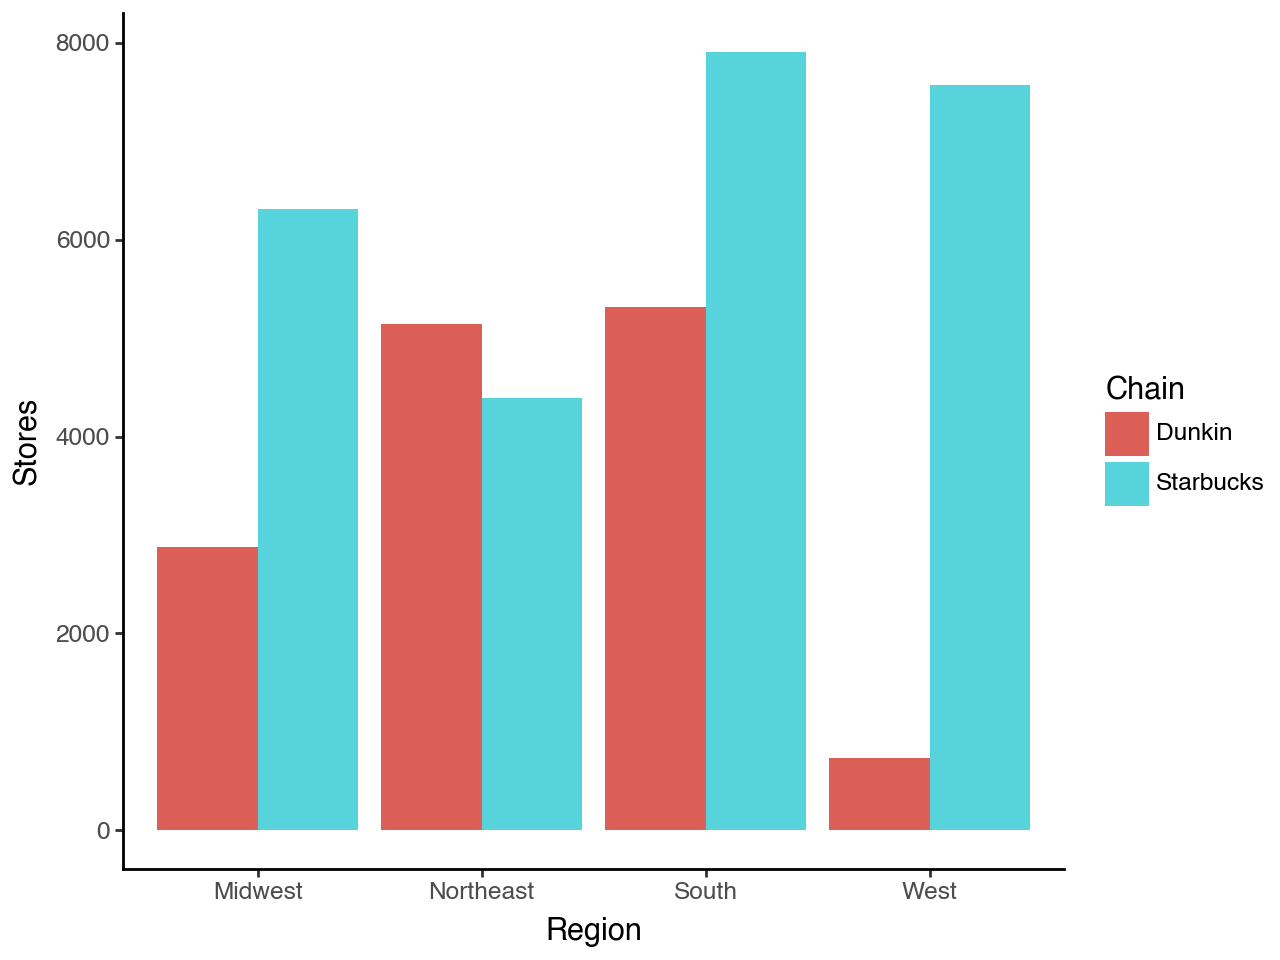

In [193]:
final_graph = final_merged.groupby(["Region","Chain"])["Stores"].sum().reset_index()

(ggplot(final_graph,
aes(
    x= "Region",
    y="Stores",
    fill = "Chain",
))
+geom_bar(stat='identity', position= 'dodge')
+theme_classic()
)